# Modélisation BERT pour classification des images par leur OCR avec tensorflow
Oui, après l'OCR et avant la tokenisation pour BERT, vous pouvez nettoyer le texte en supprimant les stop words et en appliquant la lemmatisation. Cependant, la pertinence de ces étapes dépend de l'objectif et du type de modèle que vous utilisez, notamment si vous utilisez un modèle basé sur des transformers comme BERT.

1. Stop Words :
Les stop words sont des mots fréquents qui ont généralement peu de valeur ajoutée pour certaines tâches de NLP traditionnelles, comme les mots fonctionnels ("le", "de", "et", "un", etc.).

Utilisation avec BERT :
Transformers comme BERT sont pré-entraînés pour apprendre à partir du texte brut sans suppression des stop words. BERT peut tirer des informations contextuelles des stop words en raison de son mécanisme d'attention.
Supprimer les stop words n'est pas nécessaire avec BERT et peut parfois même être contre-productif, car ces mots jouent un rôle dans le contexte des phrases. BERT utilise tout le texte, y compris les stop words, pour comprendre le sens du contenu.
Conseil : Pour des tâches avec des modèles comme BERT, il est généralement préférable de ne pas retirer les stop words. Cependant, pour d'autres types de modèles plus simples (comme les TF-IDF ou des modèles de régression logistique), supprimer les stop words peut aider à simplifier le texte.

2. Lemmatisation :
La lemmatisation consiste à réduire un mot à sa forme canonique (par exemple, "courir" au lieu de "courait" ou "couru"). Cela peut être utile pour réduire la variance linguistique en regroupant des formes similaires de mots.

Utilisation avec BERT :
BERT est capable de gérer différentes formes de mots grâce à son apprentissage sur de grands corpus de texte, où il a appris les relations entre les différentes formes des mots. La lemmatisation est donc moins importante avec BERT.
BERT utilise des sous-tokens pour traiter les mots rares ou complexes, ce qui permet de capturer des relations même sans lemmatisation.
Conseil : Comme BERT utilise des sous-tokens et peut traiter différentes formes de mots sans problèmes, la lemmatisation est généralement non nécessaire pour les modèles BERT. Toutefois, cela peut être bénéfique si votre texte OCR contient des erreurs ou des variantes linguistiques excessives.

3. Nettoyage supplémentaire du texte :
En plus de la suppression des stop words et de la lemmatisation, d'autres étapes de nettoyage peuvent être envisagées après l'OCR :

Suppression des caractères spéciaux : Les textes extraits par OCR peuvent contenir des caractères indésirables ou des erreurs.
Correction des fautes d'orthographe : Si votre OCR introduit des fautes de frappe ou des erreurs, corriger ces erreurs avant d'envoyer le texte dans BERT peut améliorer les résultats.

In [ ]:


# Pour utiliser Hugging Face Transformers (pour le modèle BERT et le tokenizer)
!pip install transformers

# Pour manipuler des datasets avec Hugging Face (facultatif mais utile pour gérer les datasets)
!pip install datasets

# Pour travailler avec des DataFrames (par exemple pour `df_ocr`)
!pip install pandas

# Pour la division des jeux de données (train/test split)
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#chemin pour trouver les datasets en enregistrer le csv
results_dir = '/content/result/'
# Vérifier si le répertoire results_dir existe et le créer s'il n'existe pas
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

!cp "/content/drive/MyDrive/formation Datascientest/RVL-CDIP/ocr_train_dataset_ID_propre.csv" "/content/result"

In [ ]:
!cp "/content/drive/MyDrive/formation Datascientest/RVL-CDIP/OCR_test_propre.csv" "/content/result"
!cp "/content/drive/MyDrive/formation Datascientest/RVL-CDIP/ocr_val_propre.csv" "/content/result"

In [ ]:
import pandas as pd

#-------------------------------------------------------------------------------
#paramétrage de lancement
#-------------------------------------------------------------------------------
results_dir = '/content/result/'
csv_name = 'ocr_train_dataset_ID_propre.csv'
csv_test_name = 'OCR_test_propre.csv'
csv_val_name = 'ocr_val_propre.csv'
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
df_ocr = pd.read_csv(results_dir + csv_name)
df_ocr['texte_de_ocr'].fillna('', inplace=True)
df_ocr['texte_de_ocr'] = df_ocr['texte_de_ocr'].astype(str)

df_test_ocr = pd.read_csv(results_dir + csv_test_name)
df_test_ocr['texte_de_ocr'].fillna('', inplace=True)
df_test_ocr['texte_de_ocr'] = df_test_ocr['texte_de_ocr'].astype(str)

df_val_ocr = pd.read_csv(results_dir + csv_val_name)
df_val_ocr['texte_de_ocr'].fillna('', inplace=True)
df_val_ocr['texte_de_ocr'] = df_val_ocr['texte_de_ocr'].astype(str)

# Prétraitement du texte pour le pipeline NLP
Nous allons utiliser le tokenizer BERT pour préparer les données textuelles contenues dans la colonne texte_de_ocr de votre DataFrame. Voici comment effectuer le prétraitement des données.

Charger le tokenizer BERT.
Appliquer le tokenizer sur chaque texte de la DataFrame.
Préparer les données pour être compatibles avec un modèle BERT.

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf
from tqdm import tqdm  # Importer tqdm pour la barre de progression

# Charger le tokenizer BERT pré-entraîné
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Fonction pour tokeniser le texte et ajouter l'image_ID avec barre de progression
def preprocess_texts(texts, image_ids):
    tokens_list = []
    image_ids_list = []

    # Utiliser tqdm pour afficher une barre de progression
    for text, image_id in tqdm(zip(texts, image_ids), total=len(texts), desc="Tokenisation"):
        tokens = tokenizer(
            text,  # Tokeniser un seul texte à la fois
            padding='max_length',
            truncation=True,
            max_length=512,
            return_tensors='tf'
        )
        tokens_list.append(tokens)
        image_ids_list.append(image_id)

    # Combiner tous les tokens dans un seul batch
    input_ids = tf.concat([t['input_ids'] for t in tokens_list], axis=0)
    attention_mask = tf.concat([t['attention_mask'] for t in tokens_list], axis=0)
    image_ID = tf.constant(image_ids_list)  # Convertir les image_ID en tenseurs

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'image_ID': image_ID}

# Appliquer le prétraitement sur le texte et ajouter les image_ID pour les ensembles train, test, validation
tokens_train  = preprocess_texts(df_ocr['texte_de_ocr'], df_ocr['image_ID'])
labels_train = df_ocr['label_de_image'].tolist()

tokens_test = preprocess_texts(df_test_ocr['texte_de_ocr'], df_test_ocr['image_ID'])
labels_test = df_test_ocr['label_de_image'].tolist()

tokens_val = preprocess_texts(df_val_ocr['texte_de_ocr'], df_val_ocr['image_ID'])
labels_val = df_val_ocr['label_de_image'].tolist()


Tokenisation: 100%|██████████| 40000/40000 [04:07<00:00, 161.33it/s]


# Classification des documents avec BERT
Maintenant que nous avons prétraité les textes, nous allons construire un modèle de classification basé sur BERT. Le modèle va apprendre à prédire les labels des documents à partir des textes extraits.

Charger un modèle BERT pré-entraîné pour la classification.
Préparer les données pour l'entraînement (input_ids, attention_masks, labels).
Entraîner et évaluer le modèle.
5.1. Préparation des données pour l'entraînement
Nous devons associer les textes tokenisés à leurs labels et préparer les tenseurs pour l'entraînement.

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer


# Créer un TensorFlow dataset pour l'entraînement et le test
def create_tf_dataset(tokens, labels):
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': tokens['input_ids'],
            'attention_mask': tokens['attention_mask'],
            'image_ID': tokens['image_ID'],  # Ajouter les image_ID aux datasets
        },
        tf.convert_to_tensor(labels, dtype=tf.int64)
    ))
    return dataset

# Créer les datasets de train et test
train_dataset = create_tf_dataset(tokens_train, labels_train)
test_dataset = create_tf_dataset(tokens_test, labels_test)
val_dataset = create_tf_dataset(tokens_val, labels_val)


save_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/BERT2/'
train_dataset_save_path = os.path.join(save_dir, 'train_tf_dataset')
val_dataset_save_path = os.path.join(save_dir, 'val_tf_dataset')
test_dataset_save_path = os.path.join(save_dir, 'test_tf_dataset')

train_dataset.save(train_dataset_save_path)
val_dataset.save(val_dataset_save_path)
test_dataset.save(test_dataset_save_path)

# Préparer les DataLoader (batch et shuffle pour l'entraînement, batch uniquement pour le test)
train_dataset = train_dataset.shuffle(buffer_size=len(labels_train)).batch(16)
test_dataset = test_dataset.batch(16)
val_dataset = val_dataset.batch(16)






In [ ]:
import os
import tensorflow as tf
from tqdm import tqdm
from transformers import BertTokenizer

# Créer un TensorFlow dataset à l'aide d'un générateur pour inclure image_ID déjà dans les tokens
def create_tf_dataset(tokens, labels, batch_size=32):
    def generator():
        for i in tqdm(range(len(tokens)), desc="Création du dataset", total=len(tokens)):
            yield {tokens['input_ids'], tokens['attention_mask'], tokens['image_ID'] }, labels

    dataset_tf = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            {
                'input_ids': tf.TensorSpec(shape=(None, 512), dtype=tf.int32),
                'attention_mask': tf.TensorSpec(shape=(None, 512), dtype=tf.int32),
                'image_ID': tf.TensorSpec(shape=(), dtype=tf.string),  # Inclure les image_ID comme string
            },
            tf.TensorSpec(shape=(), dtype=tf.int64)  # Label
        )
    )

    # Batching et shuffling
    dataset_tf = dataset_tf.batch(batch_size)

    # Préchargement des données pour optimiser les performances
    dataset_tf = dataset_tf.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset_tf

# Créer les datasets de train, validation, et test
train_dataset = create_tf_dataset(tokens_train, labels_train, batch_size=16)
val_dataset = create_tf_dataset(tokens_val, labels_val, batch_size=16)
test_dataset = create_tf_dataset(tokens_test, labels_test, batch_size=16)

# Sauvegarde des datasets TensorFlow incluant les image_ID
save_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/BERT2/'
train_dataset_save_path = os.path.join(save_dir, 'train_tf_dataset')
val_dataset_save_path = os.path.join(save_dir, 'val_tf_dataset')
test_dataset_save_path = os.path.join(save_dir, 'test_tf_dataset')

train_dataset.save(train_dataset_save_path)
val_dataset.save(val_dataset_save_path)
test_dataset.save(test_dataset_save_path)

# Préparer les DataLoader (batch et shuffle pour l'entraînement, batch uniquement pour validation et test)
train_dataset = train_dataset.shuffle(buffer_size=len(labels_train)).batch(16)
val_dataset = val_dataset.batch(16)
test_dataset = test_dataset.batch(16)

print(f"Les datasets TensorFlow ont été sauvegardés dans : {save_dir}")

Création du dataset:   0%|          | 0/3 [00:00<?, ?it/s]


InvalidArgumentError: {{function_node __wrapped__SaveDataset_Tshard_func_args_0_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "<ipython-input-35-9d4910974231>", line 10, in generator
    yield {tokens['input_ids'], tokens['attention_mask'], tokens['image_ID'] }, labels

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py", line 365, in __hash__
    raise TypeError("Tensor is unhashable. "

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.


	 [[{{node PyFunc}}]] [Op:SaveDataset] name: 

#recharger les datasets préparé

In [ ]:
import os
import tensorflow as tf

save_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/BERT2/'
train_dataset_save_path = os.path.join(save_dir, 'train_tf_dataset')
val_dataset_save_path = os.path.join(save_dir, 'val_tf_dataset')
test_dataset_save_path = os.path.join(save_dir, 'test_tf_dataset')

train_dataset = tf.data.Dataset.load(train_dataset_save_path).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.load(val_dataset_save_path).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.load(test_dataset_save_path).prefetch(tf.data.AUTOTUNE)

# Appliquer shuffle et batch après le chargement
train_dataset = train_dataset.shuffle(1000).batch(16)
test_dataset = test_dataset.batch(16)
val_dataset = val_dataset.batch(16)

In [ ]:
def verify_tf_dataset(dataset_path, dataset_name):
    try:
        # Recharger le dataset TensorFlow sauvegardé
        loaded_dataset = tf.data.Dataset.load(dataset_path)

        # Vérifier le nombre d'éléments dans le dataset
        count = loaded_dataset.cardinality().numpy()
        print(f"{dataset_name} : {count} exemples chargés avec succès.")

        # Afficher quelques exemples pour vérifier les données
        for input_ids, label  in loaded_dataset.take(1):
            print(f"Exemple du dataset {dataset_name}:")
            print(f"  - Input IDs : {input_ids['input_ids'].shape}")
            print(f"  - Attention Mask : {input_ids['attention_mask'].shape}")
            print(f"  - Image ID : {input_ids['image_ID'].numpy()}")
            print(f"  - Label : {label.numpy()}")
    except Exception as e:
        print(f"Erreur lors du chargement du dataset {dataset_name}: {e}")

# Vérifier les 3 datasets sauvegardés
load_path = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/BERT2/'
train_dataset_load_path = os.path.join(load_path, 'train_tf_dataset')
val_dataset_load_path = os.path.join(load_path, 'val_tf_dataset')
test_dataset_load_path = os.path.join(load_path, 'test_tf_dataset')

verify_tf_dataset(train_dataset_load_path, 'Dataset d\'entraînement')
verify_tf_dataset(val_dataset_load_path, 'Dataset de validation')
verify_tf_dataset(test_dataset_load_path, 'Dataset de test')

Dataset d'entraînement : 320000 exemples chargés avec succès.
Exemple du dataset Dataset d'entraînement:
  - Input IDs : (512,)
  - Attention Mask : (512,)
  - Image ID : b'148bcae3-2062-4e97-a1c5-5da854d4f417'
  - Label : 8
Dataset de validation : 40000 exemples chargés avec succès.
Exemple du dataset Dataset de validation:
  - Input IDs : (512,)
  - Attention Mask : (512,)
  - Image ID : b'0fce6cc0-aef5-48f1-a56e-fd8794337fb0'
  - Label : 6
Dataset de test : 39999 exemples chargés avec succès.
Exemple du dataset Dataset de test:
  - Input IDs : (512,)
  - Attention Mask : (512,)
  - Image ID : b'17f0fef9-3f3c-4e51-8b7d-06bf1aac2f16'
  - Label : 12


# Entraînement du modèle BERT pour la classification
Nous allons maintenant charger un modèle BERT pour la classification de séquences et l'entraîner sur le dataset tokenisé.

In [ ]:
print(tokens_train['input_ids'].shape)

(320000, 512)


In [ ]:
for inputs, labels in train_dataset.take(1):
    print(f"Input IDs shape: {inputs['input_ids'].shape}")
    print(f"Attention Mask shape: {inputs['attention_mask'].shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Keys in input: {inputs.keys()}")

Création du dataset: 100%|██████████| 320000/320000 [10:03<00:00, 530.59it/s]


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer

def remove_image_id(dataset):
    def map_fn(inputs, labels):
        # Exclure image_ID
        inputs_without_image_id = {key: value for key, value in inputs.items() if key != 'image_ID'}
        return inputs_without_image_id, labels

    return dataset.map(map_fn)

train_dataset = remove_image_id(train_dataset)
val_dataset = remove_image_id(val_dataset)
test_dataset = remove_image_id(test_dataset)

# Charger le modèle BERT pré-entraîné pour la classification avec 16 labels
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=16)

# Compiler le modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-8, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Définir les callbacks (sauvegarde des checkpoints et early stopping)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='./results/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Entraîner le modèle
history = model.fit(
    train_dataset,                # Dataset d'entraînement
    validation_data=val_dataset,  # Dataset de validation
    epochs=20,                      # Nombre d'époques
    batch_size=128,                 # Taille de batch
    callbacks=[checkpoint, early_stopping]
)

# model.save('/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/BERT/saved_model')
# model.save('/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/BERT/saved_model.keras')
model.save_pretrained('/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/BERT/saved_model', saved_model=True)
# Évaluer le modèle sur le dataset de test
results = model.evaluate(test_dataset)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
20000/20000 [==============================] - 4864s 241ms/step - loss: 0.7641 - accuracy: 0.7721 - val_loss: 0.6171 - val_accuracy: 0.8186
Epoch 2/20
20000/20000 [==============================] - 4785s 239ms/step - loss: 0.5353 - accuracy: 0.8419 - val_loss: 0.5629 - val_accuracy: 0.8378
Epoch 3/20
20000/20000 [==============================] - 4783s 239ms/step - loss: 0.4428 - accuracy: 0.8700 - val_loss: 0.5756 - val_accuracy: 0.8368
Epoch 4/20
20000/20000 [==============================] - 4771s 239ms/step - loss: 0.3793 - accuracy: 0.8885 - val_loss: 0.6139 - val_accuracy: 0.8357


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


NameError: name 'tokenizer' is not defined

#rechargement du modèle

In [ ]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf
# Charger le modèle sauvegardé en .keras
# Charger le modèle sauvegardé
model = TFBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01')
# Optionnel : Résumé du modèle chargé
model.summary()

# Compiler le modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-8, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

def remove_image_id(dataset):
    def map_fn(inputs, labels):
        # Exclure image_ID
        inputs_without_image_id = {key: value for key, value in inputs.items() if key != 'image_ID'}
        return inputs_without_image_id, labels

    return dataset.map(map_fn)

test_dataset = remove_image_id(test_dataset)

results = model.evaluate(test_dataset)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

Some layers from the model checkpoint at /content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01 were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01.
If your task is similar to the task the model of the checkpoint was train

Model: "tf_bert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_151 (Dropout)       multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  12304     
                                                                 
Total params: 109494544 (417.69 MB)
Trainable params: 109494544 (417.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2500/2500 [==============================] - 215s 82ms/step - loss: 0.5630 - accuracy: 0.8395
Test Loss: 0.5630103349685669, Test Accuracy: 0.8395209908485413


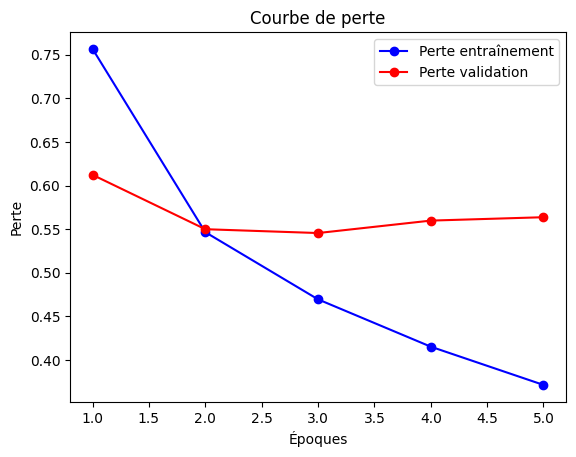

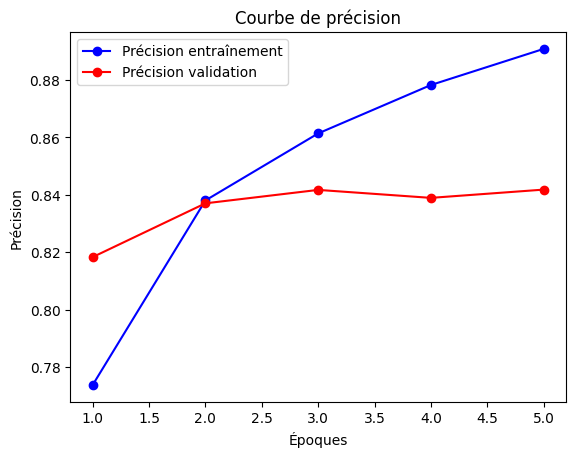

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les valeurs de perte et d'accuracy depuis l'objet history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Tracer la courbe de perte
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo-', label='Perte entraînement')
plt.plot(epochs, val_loss, 'ro-', label='Perte validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Récupérer les valeurs de précision
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Tracer la courbe de précision
plt.plot(epochs, train_acc, 'bo-', label='Précision entraînement')
plt.plot(epochs, val_acc, 'ro-', label='Précision validation')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()








# sauvegarde du modèle

In [ ]:
import os
import shutil

# Spécifier le répertoire où enregistrer le modèle
output_dir = 'content/saved_model/'

# Vérifier si le répertoire existe, sinon le créer
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Répertoire {output_dir} créé avec succès.")
else:
    print(f"Le répertoire {output_dir} existe déjà.")

# Sauvegarder le modèle entraîné (TensorFlow version)
model.save_pretrained(output_dir, saved_model=True)

# Sauvegarder le tokenizer utilisé pour la tokenisation
tokenizer.save_pretrained(output_dir)

print(f"Le modèle et le tokenizer ont été sauvegardés dans le répertoire {output_dir}")

# Chemin du répertoire sur Google Drive
drive_model_dir = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01/'
if not os.path.exists(drive_model_dir):
    os.makedirs(drive_model_dir)
    print(f"Répertoire {drive_model_dir} créé avec succès.")
else:
    print(f"Le répertoire {drive_model_dir} existe déjà.")
# Copier le répertoire local vers Google Drive
shutil.copytree(output_dir, drive_model_dir, dirs_exist_ok=True)

print(f"Le répertoire {output_dir} a été copié sur Google Drive à {drive_model_dir}.")


Répertoire content/saved_model/ créé avec succès.
Le modèle et le tokenizer ont été sauvegardés dans le répertoire content/saved_model/
Répertoire /content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01/ créé avec succès.
Le répertoire content/saved_model/ a été copié sur Google Drive à /content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/saved_BERTmodel_tensorflow_01/.


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assurez-vous que le modèle est en mode évaluation
# (pas nécessaire explicitement en TensorFlow, mais on ne calculera pas de gradients ici)

# Listes pour stocker les prédictions et les labels réels
all_predictions = []
all_labels = []

# Boucle pour parcourir les données de test
for batch in test_dataset:  # Le test_dataset est un tf.data.Dataset
    # Récupérer les inputs et les labels depuis le dataset
    inputs = {key: val for key, val in batch[0].items()}
    labels = batch[1].numpy()

    # Faire des prédictions avec le modèle
    logits = model(inputs, training=False).logits

    # Convertir les logits en prédictions de classes
    predictions = tf.argmax(logits, axis=1).numpy()

    # Stocker les prédictions et les labels réels
    all_predictions.extend(predictions)
    all_labels.extend(labels)

# Afficher les prédictions et les labels pour vérifier
print(f"Prédictions : {all_predictions[:10]}")
print(f"Labels réels : {all_labels[:10]}")

# Calculer les métriques
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

# Afficher les métriques
print(f"Accuracy : {accuracy}")
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"F1-score : {f1}")


Prédictions : [11, 10, 14, 2, 6, 1, 12, 0, 14, 0]
Labels réels : [12, 10, 14, 2, 6, 1, 12, 0, 5, 0]
Accuracy : 0.8395709892747318
Précision : 0.8440533042972916
Rappel : 0.8395709892747318
F1-score : 0.8394739708845722


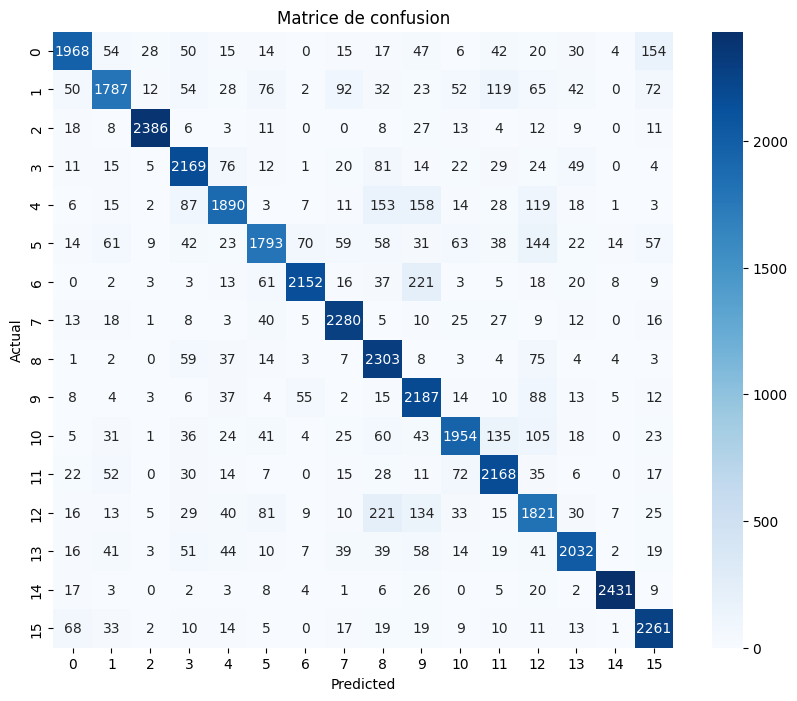

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(all_labels, all_predictions)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Dictionnaire des labels (ajustez-le selon votre jeu de données)
labels_dict = {
    0: "letter", 1: "form", 2: "email", 3: "handwritten", 4: "advertisement",
    5: "scientific report", 6: "scientific publication", 7: "specification",
    8: "file folder", 9: "news article", 10: "budget", 11: "invoice",
    12: "presentation", 13: "questionnaire", 14: "resume", 15: "memo"
}
# Obtenir un rapport détaillé avec précision, rappel et F1-score pour chaque classe
rapport = classification_report(all_labels, all_predictions, target_names=list(labels_dict.values()))
print(rapport)

                        precision    recall  f1-score   support

                letter       0.88      0.80      0.84      2464
                  form       0.84      0.71      0.77      2506
                 email       0.97      0.95      0.96      2516
           handwritten       0.82      0.86      0.84      2532
         advertisement       0.83      0.75      0.79      2515
     scientific report       0.82      0.72      0.77      2498
scientific publication       0.93      0.84      0.88      2571
         specification       0.87      0.92      0.90      2472
           file folder       0.75      0.91      0.82      2527
          news article       0.72      0.89      0.80      2463
                budget       0.85      0.78      0.81      2505
               invoice       0.82      0.88      0.84      2477
          presentation       0.70      0.73      0.71      2489
         questionnaire       0.88      0.83      0.85      2435
                resume       0.98      

<Figure size 1200x800 with 0 Axes>

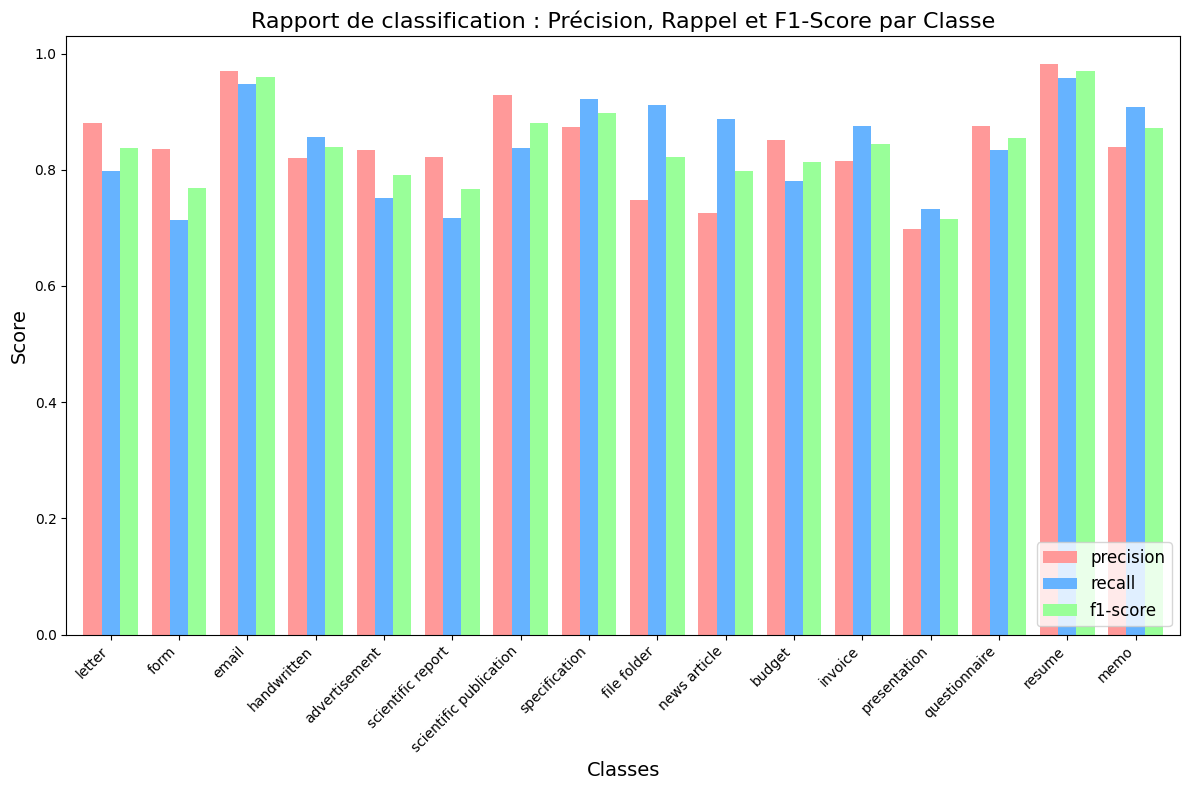

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report



# Générer le rapport de classification en tant que dictionnaire
rapport_dict = classification_report(all_labels, all_predictions, target_names=list(labels_dict.values()), output_dict=True)

# Convertir le dictionnaire en DataFrame pour plus de simplicité
df_rapport = pd.DataFrame(rapport_dict).transpose()

# Sélectionner uniquement les classes (exclure 'accuracy', 'macro avg', 'weighted avg')
df_classes = df_rapport.iloc[:-3, :3]  # On prend uniquement precision, recall et f1-score pour chaque classe

# Créer une figure pour visualiser le rapport
plt.figure(figsize=(12, 8))

# Tracer un graphique à barres pour chaque métrique (précision, rappel, f1-score)
df_classes.plot(kind='bar', figsize=(12, 8), width=0.8, color=['#FF9999', '#66B3FF', '#99FF99'])

# Ajouter des légendes et des titres
plt.title("Rapport de classification : Précision, Rappel et F1-Score par Classe", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotation des labels de classe pour meilleure lisibilité
plt.legend(loc='lower right', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


#rapport final

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Lambda
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import json
from keras.models import load_model

#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------
# Chemin vers le modèle sauvegardé et le dataset de test
model_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/models/multimodal_model_complet2.keras"
test_dataset_tf_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/models/merged_test_dataset_final"
output_file_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/models/classification_multi_report2.json"
history_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/ETAPE 3/models/history/training_multi_history2.npy'
#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------

# Charger le modèle
# model = tf.keras.models.load_model(model_path)
# model = tf.keras.models.load_model(model_path2)
# model = load_model(model_path, custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})
model = TFBertForSequenceClassification.from_pretrained(drive_model_BERT_dir)
# Charger le dataset TensorFlow de test
test_dataset_tf = tf.data.Dataset.load(test_dataset_tf_path)

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_dataset_tf)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Faire les prédictions sur le dataset de test
y_true = []  # Pour stocker les vraies étiquettes
y_pred_probs = []  # Pour stocker les probabilités prédites pour chaque classe

# Prédictions
predictions = model.predict(test_tf_dataset_prepared)
y_pred_probs = predictions

# Extraction des vraies labels
for _, labels in test_tf_dataset_prepared:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Convertir les étiquettes en format one-hot encoding (nécessaire pour ROC multi-classes)
n_classes = 16  # Le nombre de classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Calculer fprs, tprs, aucs pour chaque classe
fprs = {}
tprs = {}
aucs = {}
for i in range(n_classes):
    fprs[i], tprs[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    aucs[i] = auc(fprs[i], tprs[i])

# Les noms des labels associés aux classes avec le numéro
class_labels = ['Class 0: Letter', 'Class 1: Form', 'Class 2: Email', 'Class 3: Handwritten',
                'Class 4: Advertisement', 'Class 5: Scientific Report', 'Class 6: Scientific Publication',
                'Class 7: Specification', 'Class 8: File Folder', 'Class 9: News Article',
                'Class 10: Budget', 'Class 11: Invoice', 'Class 12: Presentation',
                'Class 13: Questionnaire', 'Class 14: Resume', 'Class 15: Memo']

# Tracer la courbe ROC avec les noms des labels et numéros de classes
plt.figure(figsize=(10, 8))
for i, (fpr, tpr, roc_auc) in enumerate(zip(fprs.values(), tprs.values(), aucs.values())):
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Matrice de confusion**
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convertir les probabilités en classes
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# **Rapport de classification sous forme de tableau**
# 1. **Afficher le rapport de classification dans la console (sans `output_dict`)**
report_console = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report (Console Output):")
print(report_console)

# 2. **Sauvegarder le rapport de classification dans un fichier JSON ou CSV avec `output_dict=True`**
report_dict = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)

# Sauvegarder en JSON
with open(output_file_path, 'w') as f:
    json.dump(report_dict, f, indent=4)

print(f"Classification report saved to {output_file_path}")

# 3. **Convertir le rapport de classification en DataFrame pour l'afficher
report_df = pd.DataFrame(report_dict).transpose()

# Supprimer les colonnes 'precision' et 'recall' pour la ligne 'accuracy'
report_df.loc['accuracy', ['precision', 'recall']] = [None, None]

# Affichage du rapport sous forme de tableau (plot)
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False, linewidths=0.5)
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# **Courbes d'apprentissage (si historique disponible)
try:
    history = np.load(history_path, allow_pickle=True).item()

    plt.figure(figsize=(12, 6))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.savefig('learning_curves.png')
    plt.show()
except FileNotFoundError:
    print("Training history not found, skipping learning curves plot.")

TypeError: list indices must be integers or slices, not tuple